\begin{align}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{align}

\begin{align}
u_{i,j}^{n+1} = u_{i,j}^n &+ \nu \Delta t (\frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} \\
&+ \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2})
\end{align}

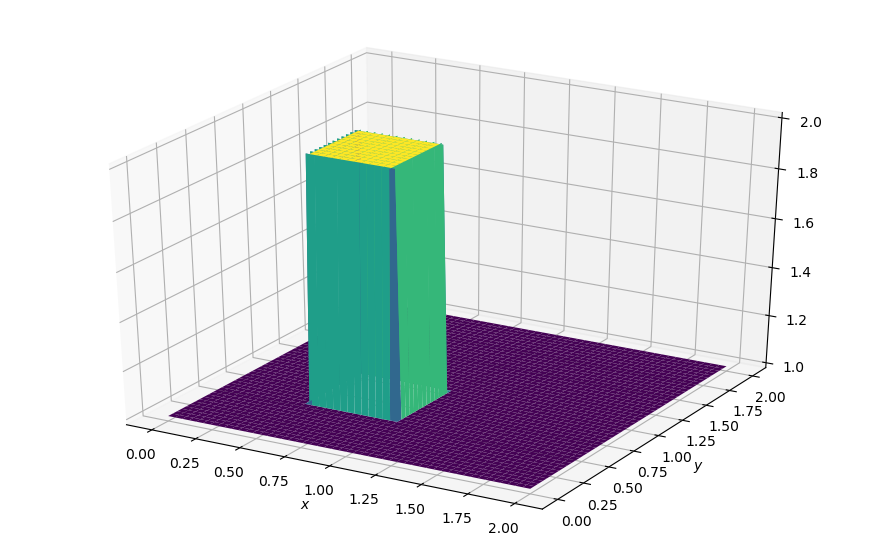

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

# Define domain
lx = 2
ly = 2
nu = 1

# Setup simulation
nx = 101
ny = 101
sigma = 0.05

dx = lx / (nx - 1)
dy = ly / (ny - 1)
dt = sigma * dx * dy / nu

x = np.linspace(0, lx, nx)
y = np.linspace(0, ly, ny)

u = np.ones((ny, nx))
un = np.ones((ny, nx))

# Define initial & boundary conditions
u[int(0.5 / dy):int(1 / dy), int(0.5 / dx):int(1 / dx)] = 2

# Plot
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [14]:
# Run n timesteps
def diffuse(nt):
    for n in range(nt):
        un = u.copy()

        u[1:-1, 1:-1] = un[1:-1, 1:-1] + nu * dt * ((un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, :-2]) / dx**2 + \
                                                    (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[:-2, 1:-1]) / dy**2)
    
        # Maintain boundary conditions
        u[0, :] = 1
        u[:, 0] = 1
        u[-1, :] = 1
        u[:, -1] = 1
    
    # Plot
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)

    ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

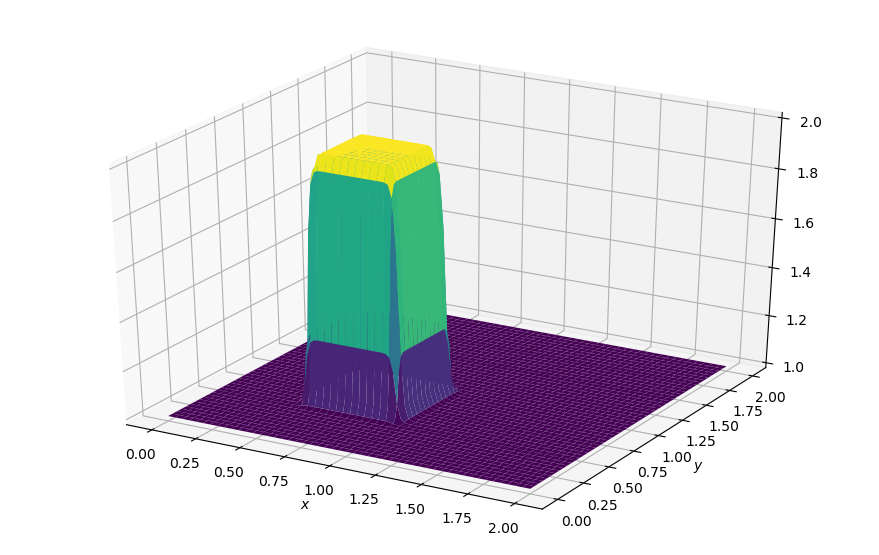

In [15]:
diffuse(10)

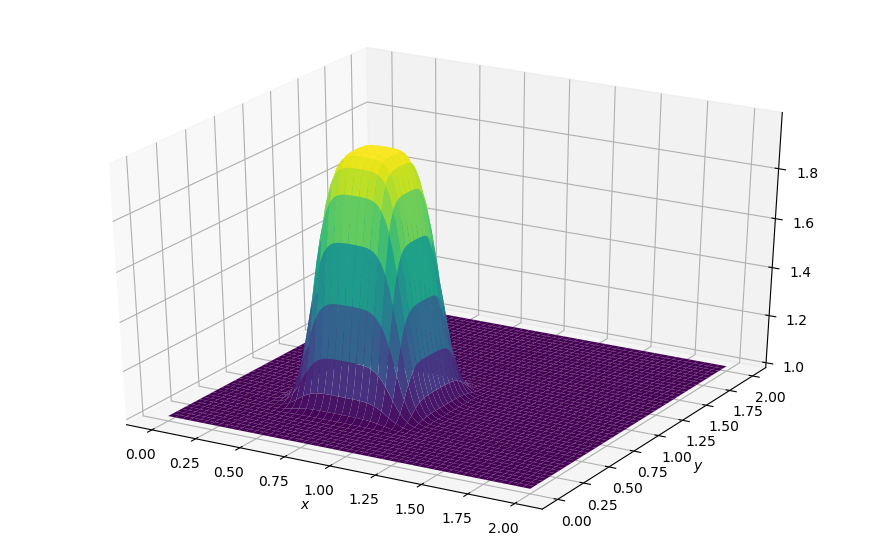

In [16]:
diffuse(100)

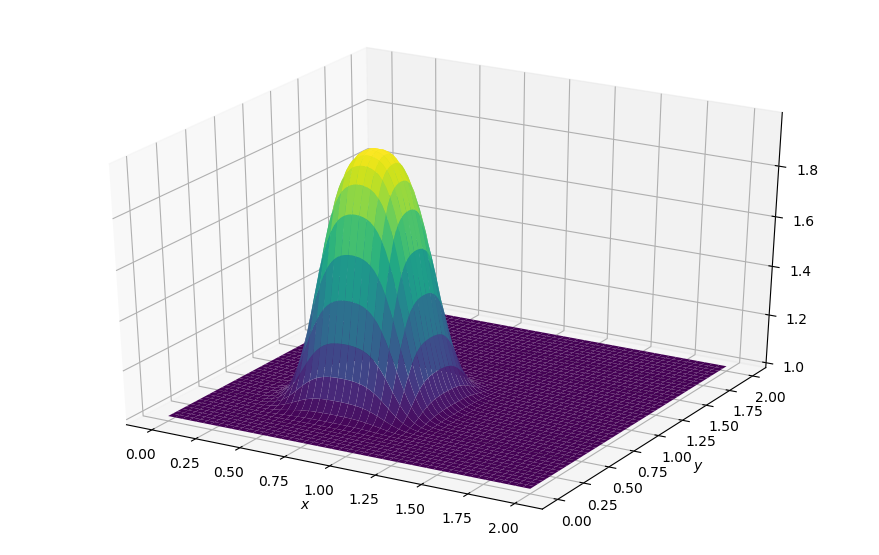

In [17]:
diffuse(100)